In [2]:
# import needed libraries to analysis
import pandas as Pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# import pillow as pil
#import plotly as plot

# Read the files needed

Purchase_path_file = r'D:\programs\projects  data analysis\The forage Projects\Quantium\Task One\QVI_purchase_behaviour.csv'

Purchase_Data  = Pd.read_csv(Purchase_path_file)

Transaction_path_file = r'D:\programs\projects  data analysis\The forage Projects\Quantium\Task One\QVI_transaction_data.csv'

Transaction_Data = Pd.read_csv(Transaction_path_file)





Initial Summary statistics:
            PROD_QTY      TOT_SALES
count  264836.000000  264836.000000
mean        1.907309       7.304200
std         0.643654       3.083226
min         1.000000       1.500000
25%         2.000000       5.400000
50%         2.000000       7.400000
75%         2.000000       9.200000
max       200.000000     650.000000
Summary statistics after capping outliers:
       PROD_QTY      TOT_SALES
count  264836.0  264836.000000
mean        2.0       7.288923
std         0.0       2.479431
min         2.0       1.500000
25%         2.0       5.400000
50%         2.0       7.400000
75%         2.0       9.200000
max         2.0      14.900000


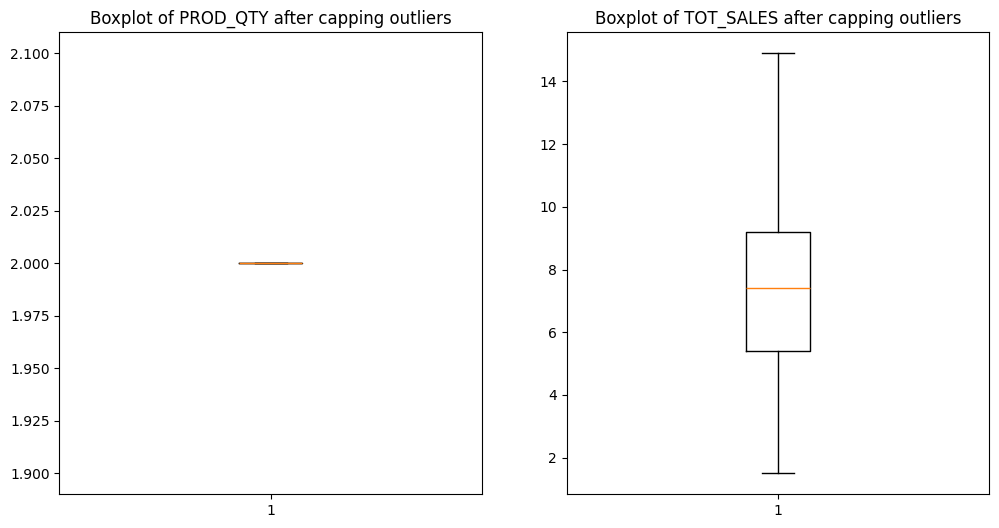

Missing values check:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64
Zeros in key columns check:
PROD_QTY     0
TOT_SALES    0
dtype: int64
Cleaned dataset saved to D:\programs\projects  data analysis\The forage Projects\Quantium\Task One\cleaned_data.csv


In [3]:

# Merge the data
merged_df = Pd.merge(Purchase_Data, Transaction_Data, on='LYLTY_CARD_NBR', how='left')

# Initial summary statistics
print("Initial Summary statistics:")
print(merged_df[['PROD_QTY', 'TOT_SALES']].describe())

# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Cap outliers in the merged dataframe
cap_outliers(merged_df, 'PROD_QTY')
cap_outliers(merged_df, 'TOT_SALES')

# Summary statistics after capping outliers
print("Summary statistics after capping outliers:")
print(merged_df[['PROD_QTY', 'TOT_SALES']].describe())

# Visualize the data after handling outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(merged_df['PROD_QTY'])
plt.title('Boxplot of PROD_QTY after capping outliers')

plt.subplot(1, 2, 2)
plt.boxplot(merged_df['TOT_SALES'])
plt.title('Boxplot of TOT_SALES after capping outliers')

plt.show()

# Verify no missing values exist
print("Missing values check:")
print(merged_df.isnull().sum())

# Verify no unexpected zeros in key columns
print("Zeros in key columns check:")
print((merged_df[['PROD_QTY', 'TOT_SALES']] == 0).sum())

# Save the cleaned data
cleaned_file_path = 'D:\programs\projects  data analysis\The forage Projects\Quantium\Task One\cleaned_data.csv'
merged_df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


In [31]:
print('Head of Data After Merge and Modeling')
print(merged_df.head())

Head of Data After Merge and Modeling
   LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER   DATE  STORE_NBR  \
0            1000  YOUNG SINGLES/COUPLES          Premium  43390          1   
1            1002  YOUNG SINGLES/COUPLES       Mainstream  43359          1   
2            1003         YOUNG FAMILIES           Budget  43531          1   
3            1003         YOUNG FAMILIES           Budget  43532          1   
4            1004  OLDER SINGLES/COUPLES       Mainstream  43406          1   

   TXN_ID  PROD_NBR                               PROD_NAME  PROD_QTY  \
0       1         5  Natural Chip        Compny SeaSalt175g       2.0   
1       2        58   Red Rock Deli Chikn&Garlic Aioli 150g       2.0   
2       3        52   Grain Waves Sour    Cream&Chives 210G       2.0   
3       4       106  Natural ChipCo      Hony Soy Chckn175g       2.0   
4       5        96          WW Original Stacked Chips 160g       2.0   

   TOT_SALES  
0        6.0  
1        2.7  
2  

C:\Users\hp\AppData\Local\Temp\ipykernel_9604\1671565035.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=merged_df, estimator=sum, ci=None)


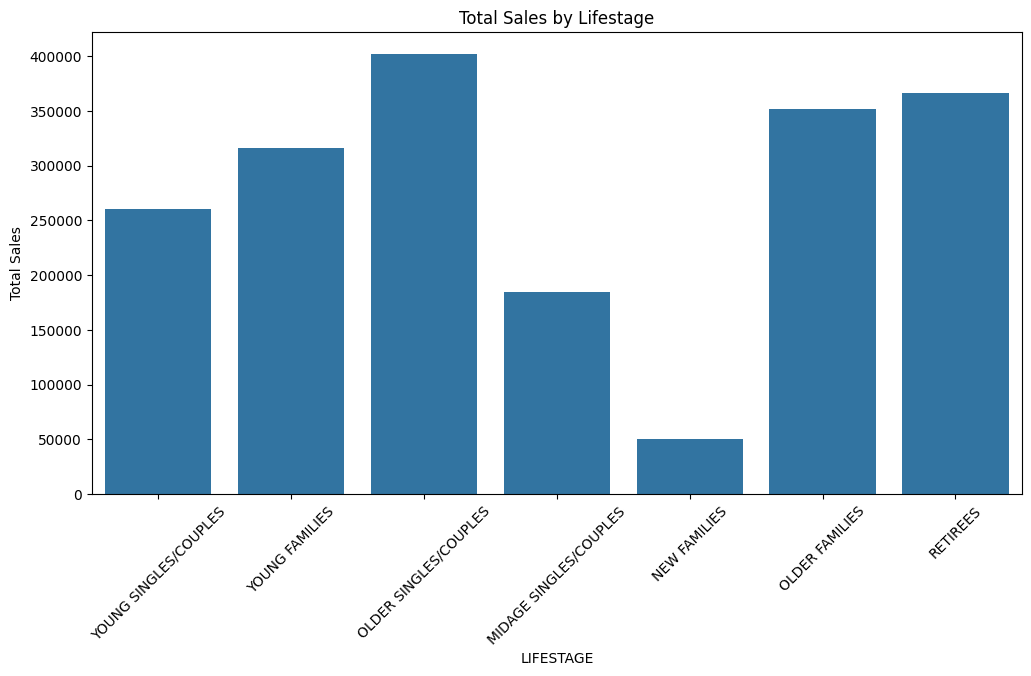

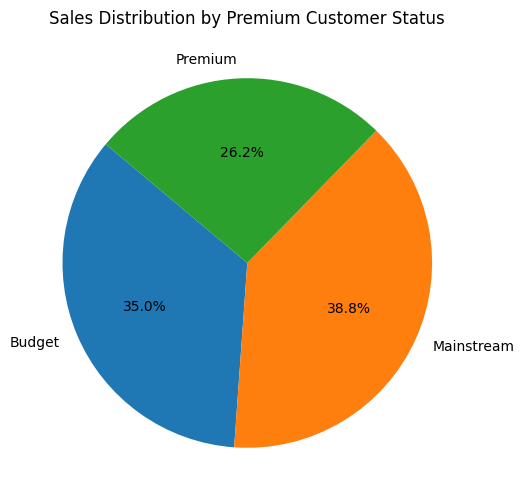

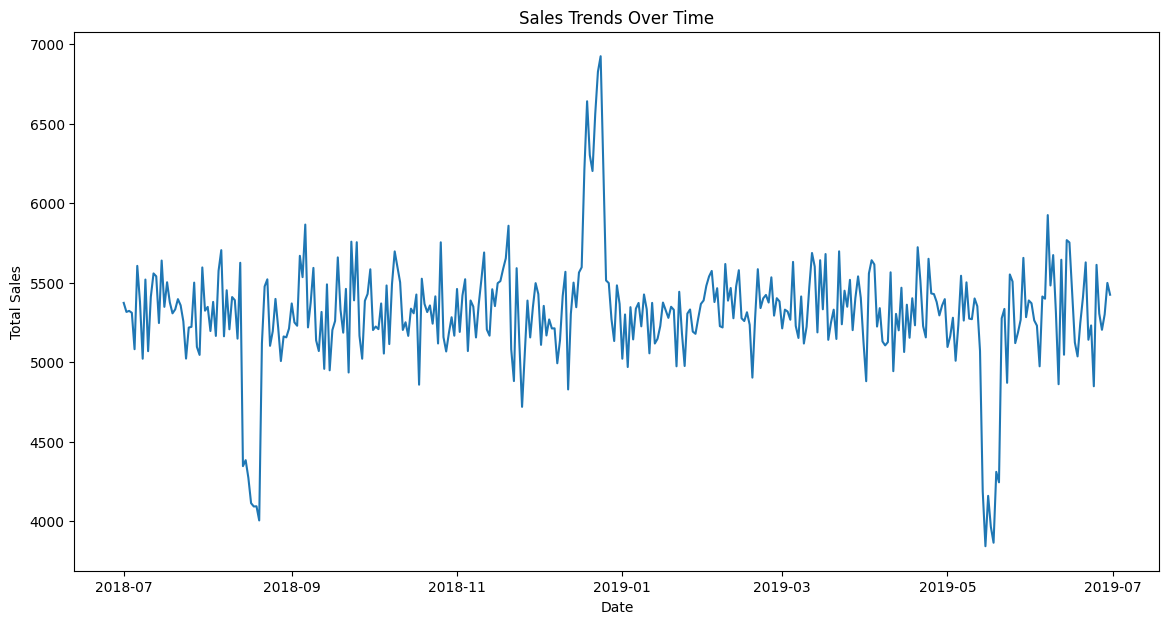

C:\Users\hp\AppData\Local\Temp\ipykernel_9604\1671565035.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PROD_QTY', y='PROD_NAME', data=top_products, ci=None)


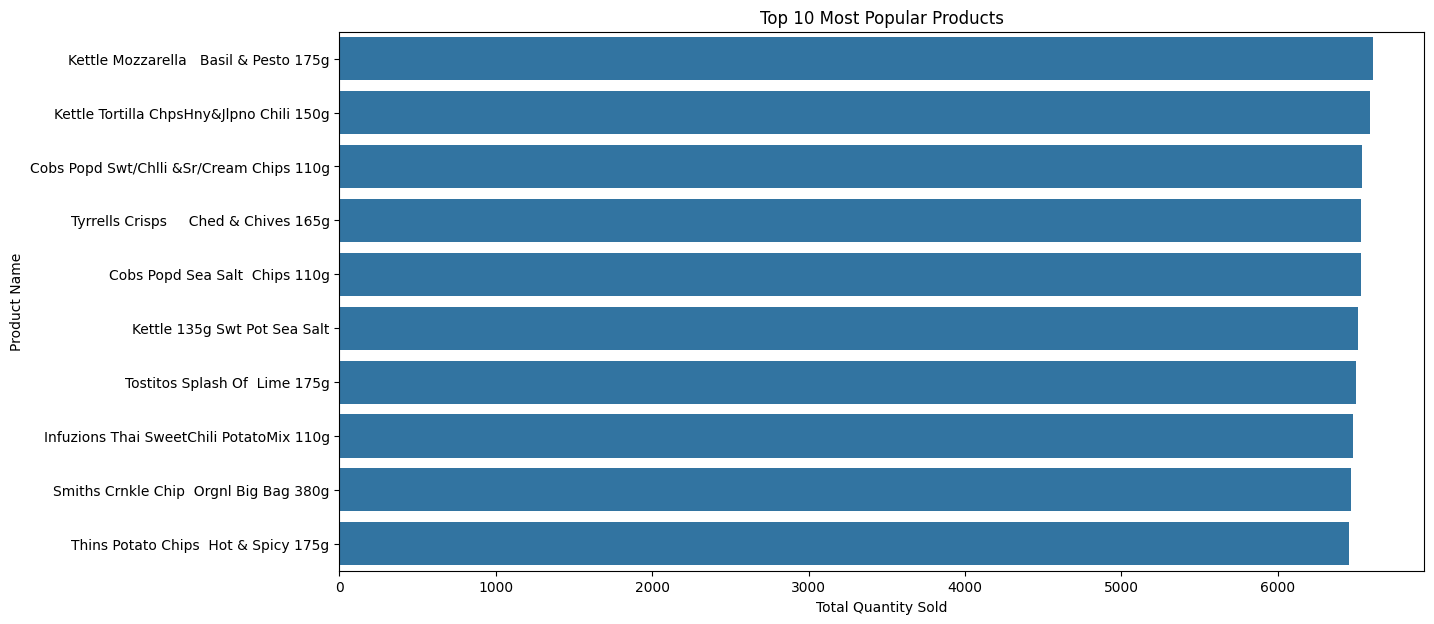

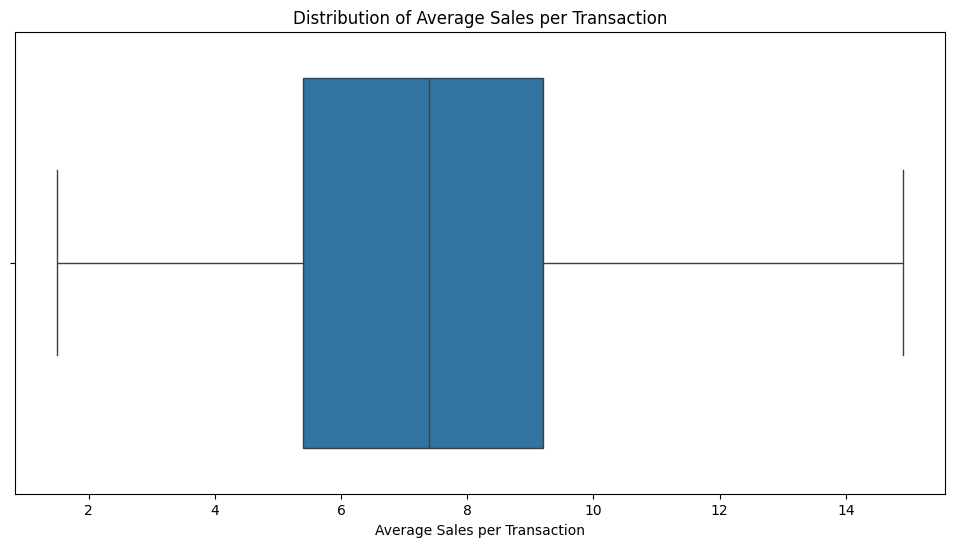

C:\Users\hp\AppData\Local\Temp\ipykernel_9604\1671565035.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TOT_SALES', y='STORE_NBR', data=top_stores, ci=None)


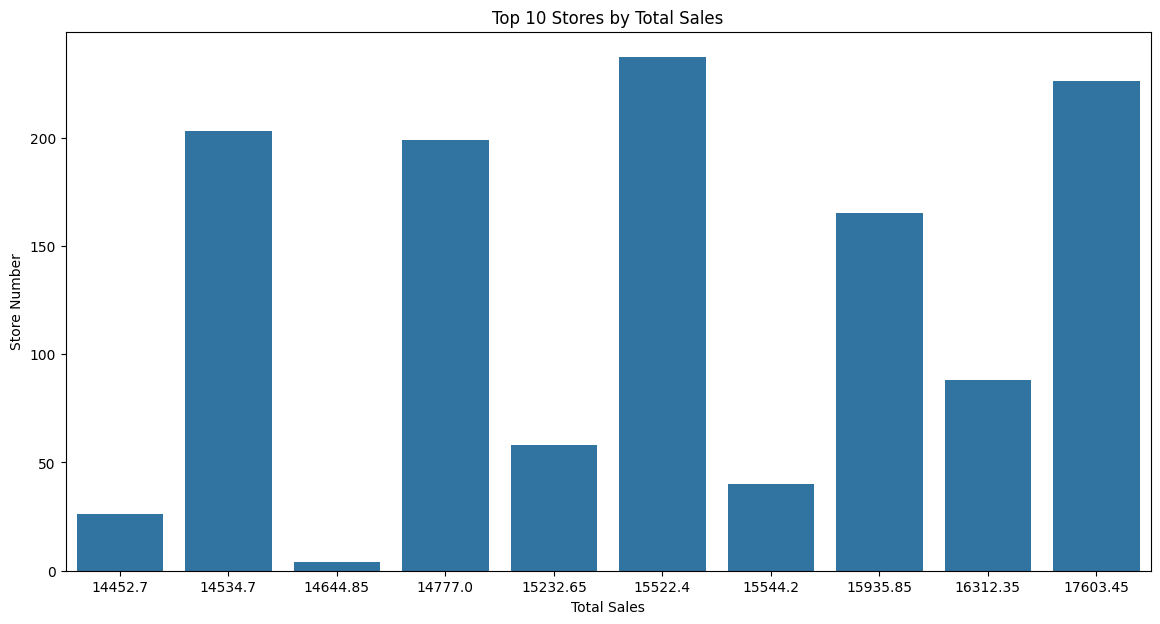

C:\Users\hp\AppData\Local\Temp\ipykernel_9604\1671565035.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PROD_QTY', y='LIFESTAGE', data=qty_by_lifestage, ci=None)


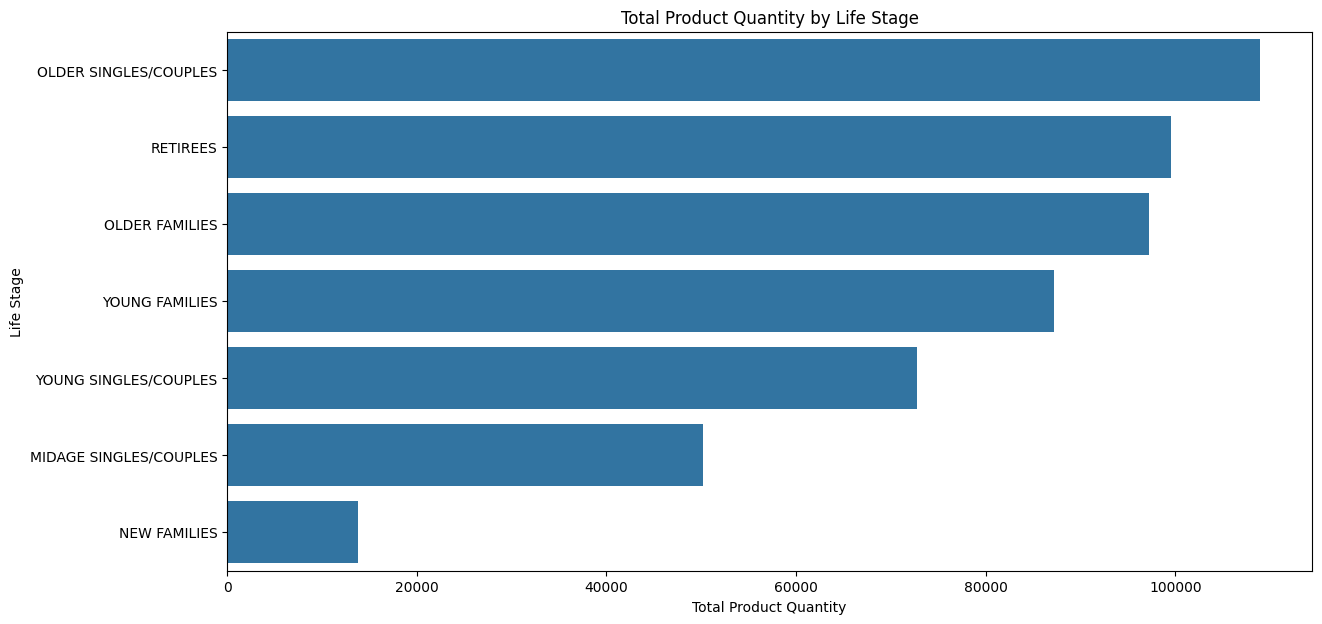

C:\Users\hp\AppData\Local\Temp\ipykernel_9604\1671565035.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TOT_SALES', y='PROD_NAME', data=sales_by_product, ci=None)


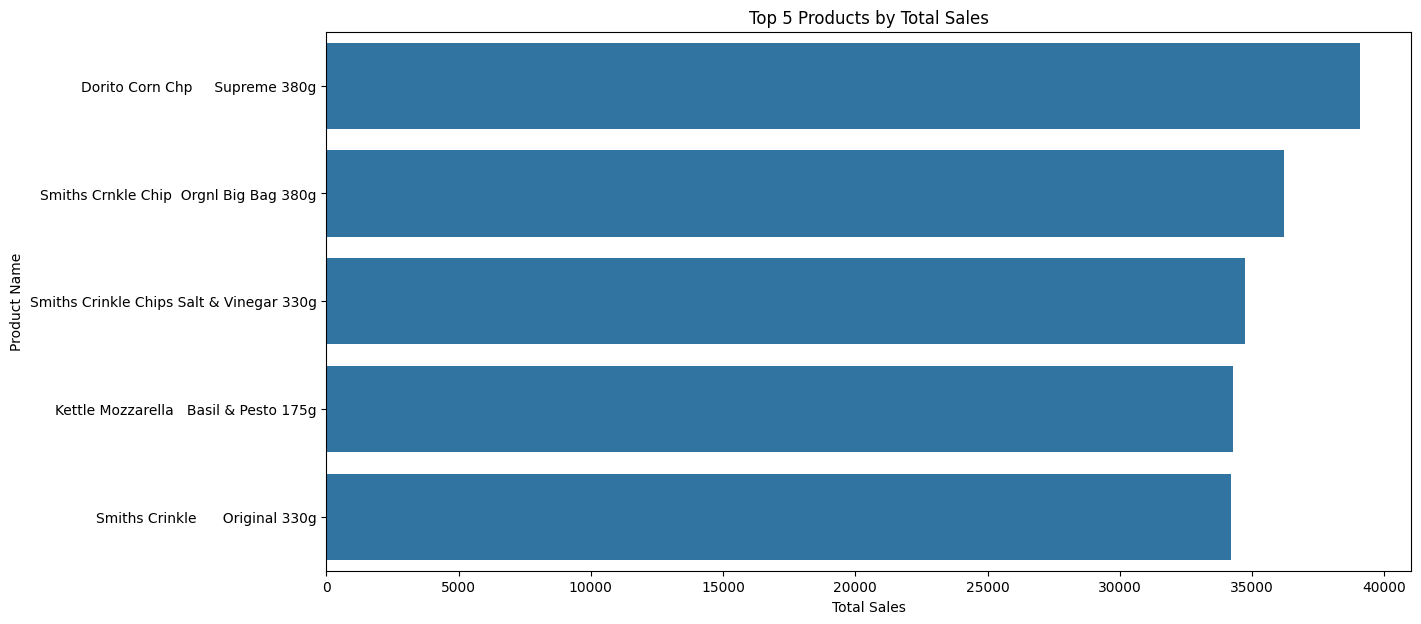

C:\Users\hp\AppData\Local\Temp\ipykernel_9604\1671565035.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PROD_QTY', y='PREMIUM_CUSTOMER', data=qty_by_premium_customer, ci=None)


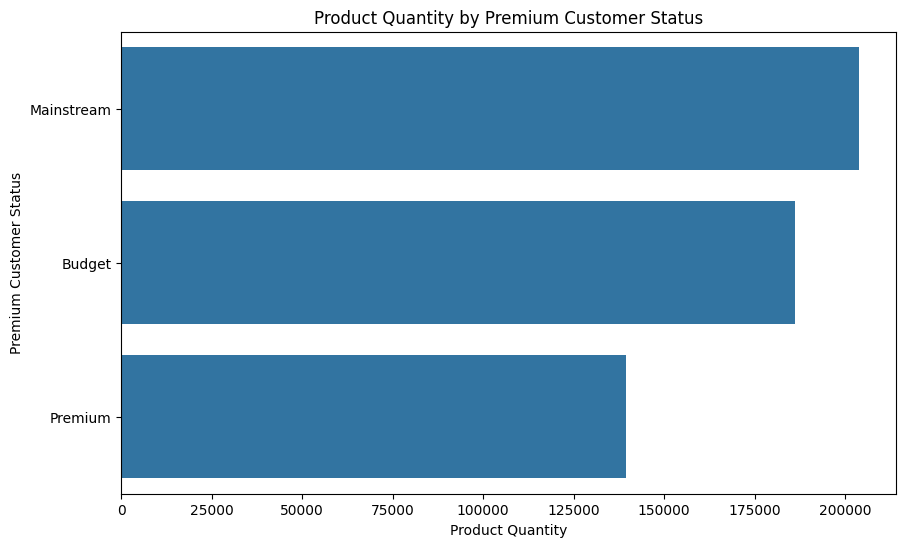

In [8]:

# Sales Distribution by Lifestage
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=merged_df, estimator=sum, ci=None)
plt.title('Total Sales by Lifestage')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

# Sales Distribution by Premium Customer Status
plt.figure(figsize=(8, 6))
merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Premium Customer Status')
plt.ylabel('')
plt.show()

# Sales Trends Over Time
merged_df['DATE'] = Pd.to_datetime(merged_df['DATE'], unit='D', origin='1899-12-30')  # Convert Excel date format
sales_trends = merged_df.groupby('DATE')['TOT_SALES'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='DATE', y='TOT_SALES', data=sales_trends)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Product Popularity
top_products = merged_df.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x='PROD_QTY', y='PROD_NAME', data=top_products, ci=None)
plt.title('Top 10 Most Popular Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# Average Sales per Transaction
avg_sales_per_txn = merged_df.groupby('TXN_ID')['TOT_SALES'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.boxplot(x=avg_sales_per_txn['TOT_SALES'])
plt.title('Distribution of Average Sales per Transaction')
plt.xlabel('Average Sales per Transaction')
plt.show()

# Sales Distribution by Store
top_stores = merged_df.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x='TOT_SALES', y='STORE_NBR', data=top_stores, ci=None)
plt.title('Top 10 Stores by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Store Number')
plt.show()

# Group by life stage and sum product quantity
qty_by_lifestage = merged_df.groupby('LIFESTAGE')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY', ascending=False)

# Plot the total product quantity by life stage
plt.figure(figsize=(14, 7))
sns.barplot(x='PROD_QTY', y='LIFESTAGE', data=qty_by_lifestage, ci=None)
plt.title('Total Product Quantity by Life Stage')
plt.xlabel('Total Product Quantity')
plt.ylabel('Life Stage')
plt.show()

# Group by product name and sum total sales, then sort and select the top five
sales_by_product = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=False).head(5)

# Plot the top five products by total sales
plt.figure(figsize=(14, 7))
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=sales_by_product, ci=None)
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

# Product Quantity by Premium Customer Status
plt.figure(figsize=(10, 6))
qty_by_premium_customer = merged_df.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY', ascending=False)
sns.barplot(x='PROD_QTY', y='PREMIUM_CUSTOMER', data=qty_by_premium_customer, ci=None)
plt.title('Product Quantity by Premium Customer Status')
plt.xlabel('Product Quantity')
plt.ylabel('Premium Customer Status')
plt.show()